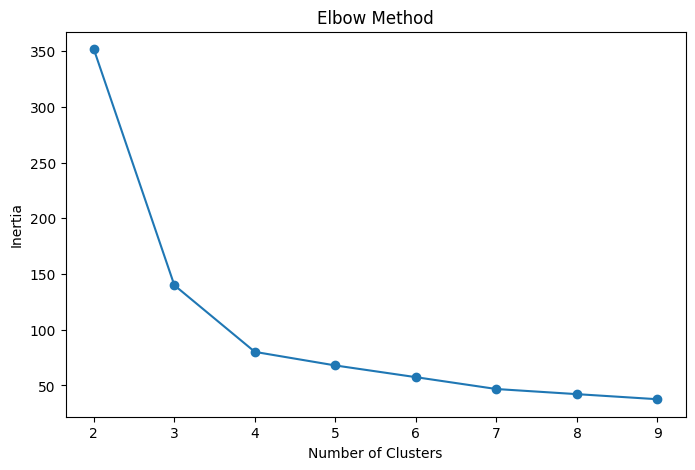

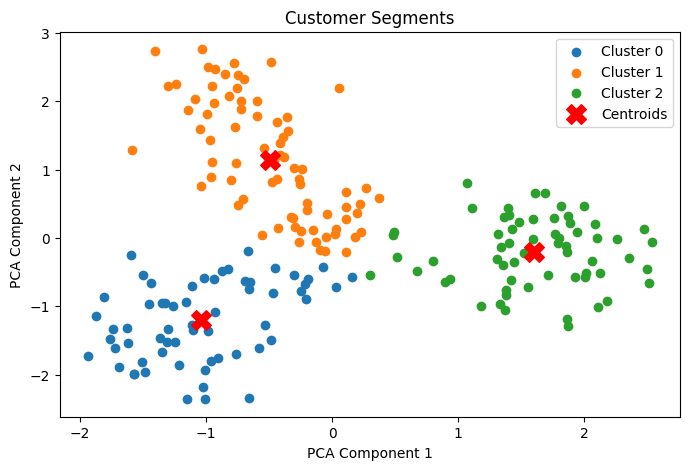

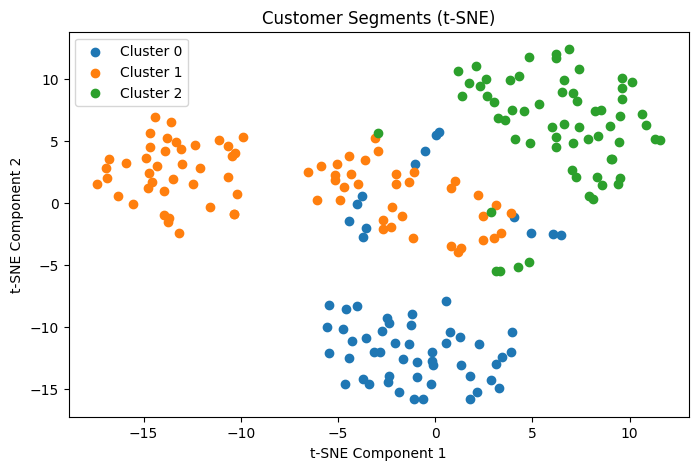

Silhouette Score: 0.17212829196687976


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Step 1: Create or Load Dataset
# Simulating a dataset for customer journeys
data = {
    'Page_Views': np.random.randint(1, 500, 200),
    'Session_Duration': np.random.uniform(1, 60, 200),
    'Bounce_Rate': np.random.uniform(0, 1, 200),
    'Traffic_Source': np.random.choice(['Organic', 'Paid', 'Referral', 'Social'], 200),
    'Time_on_Page': np.random.uniform(1, 20, 200),
    'Previous_Visits': np.random.randint(0, 10, 200),
    'Conversion_Rate': np.random.uniform(0, 1, 200)
}
df = pd.DataFrame(data)

# One-hot encode categorical data (e.g., Traffic_Source)
df = pd.get_dummies(df, columns=['Traffic_Source'], drop_first=True)

# Step 2: Data Preprocessing
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Step 3: Dimensionality Reduction
# Using PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Step 4: Clustering
# Determine the optimal number of clusters using the Elbow method
inertia = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Choose the optimal number of clusters (e.g., 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data_pca)

# Add cluster labels to the original dataset
df['Cluster'] = clusters

# Step 5: Visualization
plt.figure(figsize=(8, 5))
for cluster in range(optimal_k):
    plt.scatter(
        data_pca[clusters == cluster, 0],
        data_pca[clusters == cluster, 1],
        label=f'Cluster {cluster}'
    )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# Optional: Using t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_scaled)

plt.figure(figsize=(8, 5))
for cluster in range(optimal_k):
    plt.scatter(
        data_tsne[clusters == cluster, 0],
        data_tsne[clusters == cluster, 1],
        label=f'Cluster {cluster}'
    )
plt.title('Customer Segments (t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

# Step 6: Evaluate Clustering
silhouette_avg = silhouette_score(data_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Exporting results
df.to_csv('customer_journey_clusters.csv', index=False)